In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
import numbers
from sklearn.impute import SimpleImputer

In [ ]:
train_data_file = 'madelon_train.data'
train_labels_file = 'madelon_train.labels'
valid_data_file = 'madelon_valid.data'
valid_labels_file = 'madelon_valid.labels'
test_data_file = 'madelon_test.data'

In [ ]:
madelon_train_data = pd.read_csv(train_data_file, header=None, sep=' ')
madelon_train_labels = pd.read_csv(train_labels_file, header=None, sep=' ')
madelon_valid_data = pd.read_csv(valid_data_file, header=None, sep=' ')
madelon_valid_labels = pd.read_csv(valid_labels_file, header=None, sep=' ')
madelon_test_data = pd.read_csv(test_data_file, header=None, sep=' ')


In [ ]:
madelon_train = pd.concat([madelon_train_data, madelon_train_labels], axis=1)
madelon_valid = pd.concat([madelon_valid_data, madelon_valid_labels], axis=1)

In [ ]:
madelon_combined = pd.concat([madelon_train, madelon_valid], ignore_index=True)


In [ ]:
X_combined = madelon_combined.iloc[:, :-1]
y_combined = madelon_combined.iloc[:, -1]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.3, random_state=0)

y_train = y_train.replace({-1: 0, 1: 1})
y_test = y_test.replace({-1: 0, 1: 1})



imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [500]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [500]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, multi_class='ovr', solver='liblinear'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=0),
    'SVC': SVC(kernel='linear', probability=True),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

Training Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Training Random Forest...
Training SVC...
Training XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:39:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


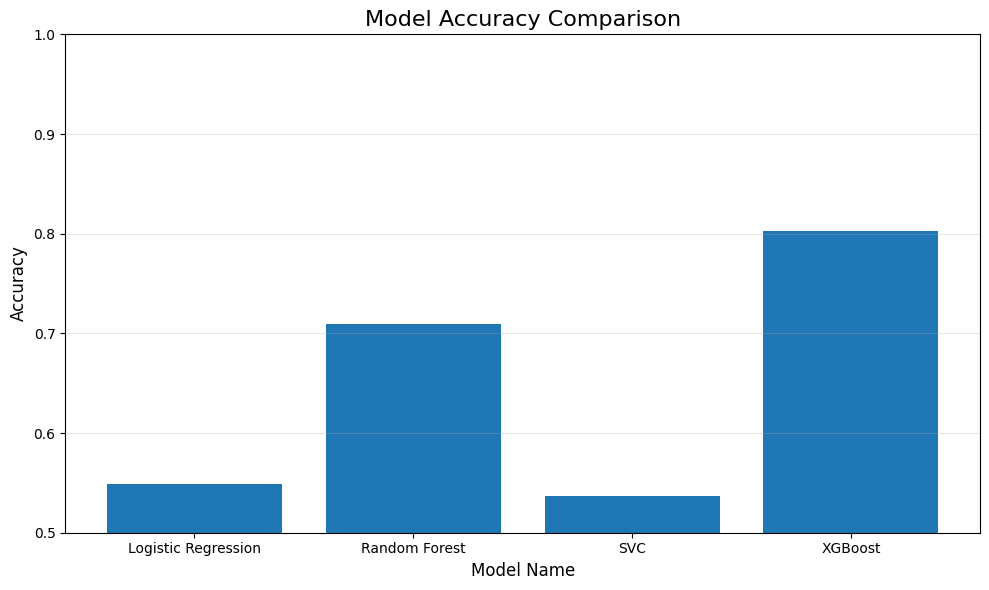

In [ ]:
model_performance = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    model_performance[model_name] = acc


# Create a bar plot of model accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_performance.keys(), model_performance.values())
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Model Name', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0.5,1) # Set y-axis limits to better view differences
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
model_performance


{'Logistic Regression': 0.5487179487179488,
 'Random Forest': 0.708974358974359,
 'SVC': 0.5371794871794872,
 'XGBoost': 0.8025641025641026}

In [ ]:
def fpefs(data):
    df = pd.DataFrame(data)
    nfeatures = len(df.columns) - 1
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    Prob = []
    for f in range(nfeatures):
        K = X.iloc[:, f]
        if isinstance(K.iloc[0], numbers.Number) and (K.max() - K.min()) > 0:
            K = round((K - K.min()) / (K.max() - K.min()), 2)
            X.iloc[:, f] = pd.Series(K)
        unique_labels = y.unique()
        num_labels = len(unique_labels)
        mu, ncount = 0, 0
        sizeulist = len(K.unique())
        grouped = X.iloc[:, f].groupby(X.iloc[:, f]).apply(lambda px: px.index.tolist()).to_dict()
        for mindex in grouped.values():
            label_list = y[mindex].unique()
            if len(label_list) < num_labels:
                mu += len(label_list) / num_labels
                ncount += 1
        Pvalue = 0 if ncount == 0 else round(1 - (1 / 2) * ((sizeulist - ncount) / sizeulist + mu / ncount), 2)
        Prob.append(Pvalue)
    return pd.DataFrame({"Feature": data.columns[:-1], "Probability": Prob})

In [ ]:
P = fpefs(madelon_combined)

Streaming output truncated to the last 5000 lines.
        ... 
2595    0.45
2596    0.29
2597    0.51
2598    0.59
2599    0.51
Name: 115, Length: 2600, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.iloc[:, f] = pd.Series(K)
<ipython-input-11-e00cbaac5ed2>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       0.45
1       0.44
2       0.50
3       0.61
4       0.44
        ... 
2595    0.59
2596    0.34
2597    0.53
2598    0.50
2599    0.60
Name: 116, Length: 2600, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.iloc[:, f] = pd.Series(K)
<ipython-input-11-e00cbaac5ed2>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       0.36
1       0.55
2       0.58
3       0.28
4       0.47
        ... 
2595    0.49
2596    0.57


In [ ]:
P

,Feature,Probability
0,0,0.30
1,1,0.35
2,2,0.32
3,3,0.34
4,4,0.35
...,...,...
496,496,0.30
497,497,0.34
498,498,0.32
499,499,0.36


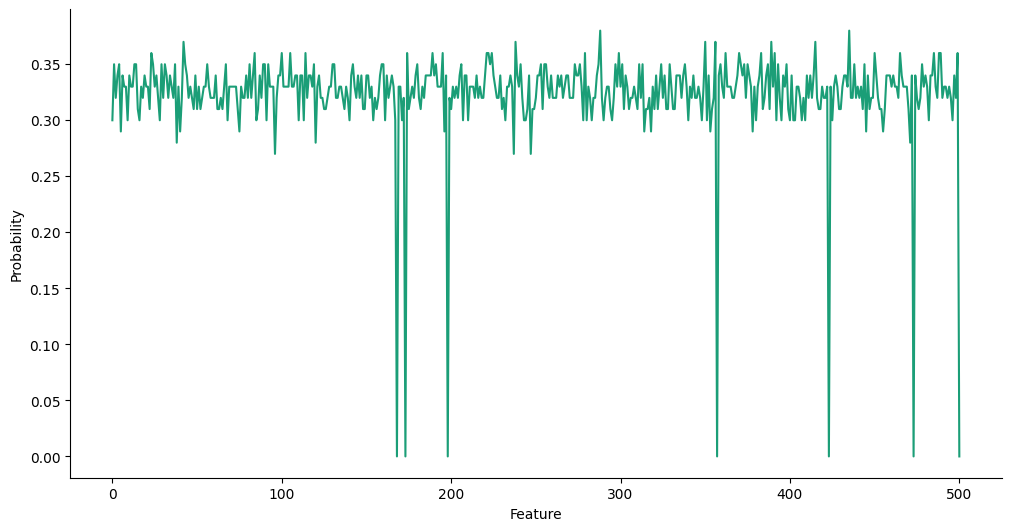

In [ ]:
# @title Feature vs Probability

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Feature']
  ys = series['Probability']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = P.sort_values('Feature', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Feature')
_ = plt.ylabel('Probability')

In [ ]:
zero_prob_features = P[P['Probability'] == 0]['Feature']
df_reduced = madelon_combined.drop(columns=zero_prob_features)

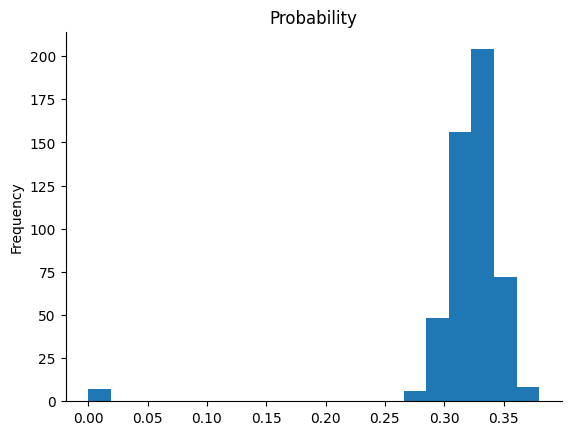

In [ ]:
from matplotlib import pyplot as plt
P['Probability'].plot(kind='hist', bins=20, title='Probability')
plt.gca().spines[['top', 'right',]].set_visible(False)

Training Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Training Random Forest...
Training SVC...
Training XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:48:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


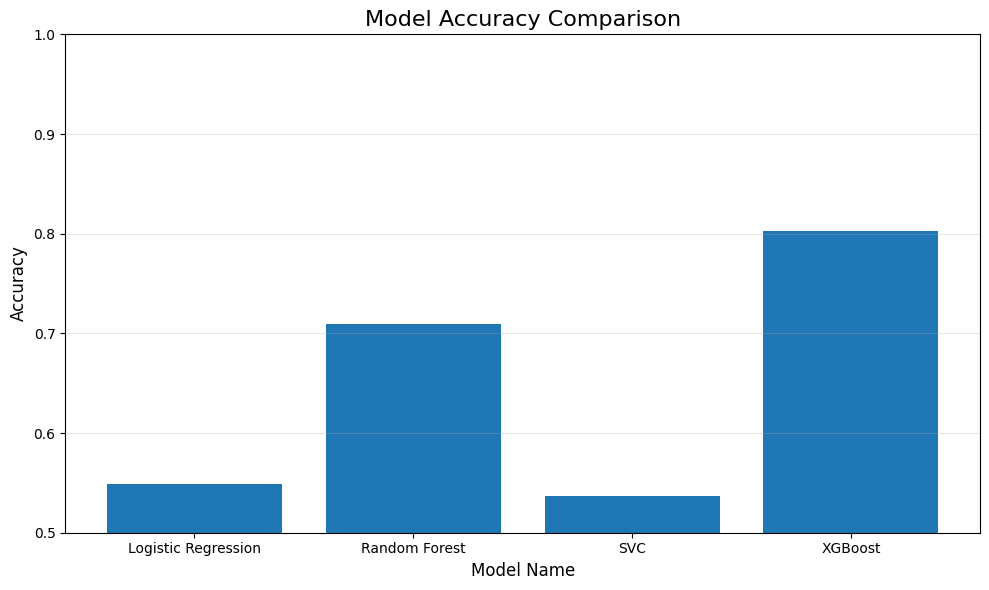

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, multi_class='ovr', solver='liblinear'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=0),
    'SVC': SVC(kernel='linear', probability=True),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

model_performance = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    model_performance[model_name] = acc


# Create a bar plot of model accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_performance.keys(), model_performance.values())
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Model Name', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0.5,1) # Set y-axis limits to better view differences
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
print(model_performance)

{'Logistic Regression': 0.5487179487179488, 'Random Forest': 0.708974358974359, 'SVC': 0.5371794871794872, 'XGBoost': 0.8025641025641026}


In [ ]:
{'Logistic Regression': 0.5487179487179488,
 'Random Forest': 0.708974358974359,
 'SVC': 0.5371794871794872,
 'XGBoost': 0.8025641025641026}

{'Logistic Regression': 0.5487179487179488,
 'Random Forest': 0.708974358974359,
 'SVC': 0.5371794871794872,
 'XGBoost': 0.8025641025641026}

Training Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Training Random Forest...
Training SVC...
Training XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:56:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Logistic Regression...
Training Random Forest...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Training SVC...
Training XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:59:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Training Random Forest...
Training SVC...
Training XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:03:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Training Random Forest...
Training SVC...
Training XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:07:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Training Random Forest...
Training SVC...
Training XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:12:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Training Random Forest...
Training SVC...
Training XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:15:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Logistic Regression...
Training Random Forest...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Training SVC...
Training XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:19:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Logistic Regression...
Training Random Forest...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Training SVC...
Training XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:19:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


No features selected for this threshold. Skipping...


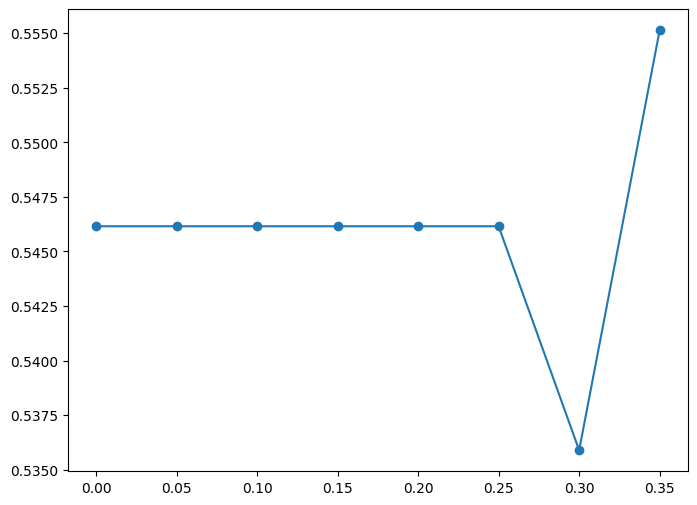

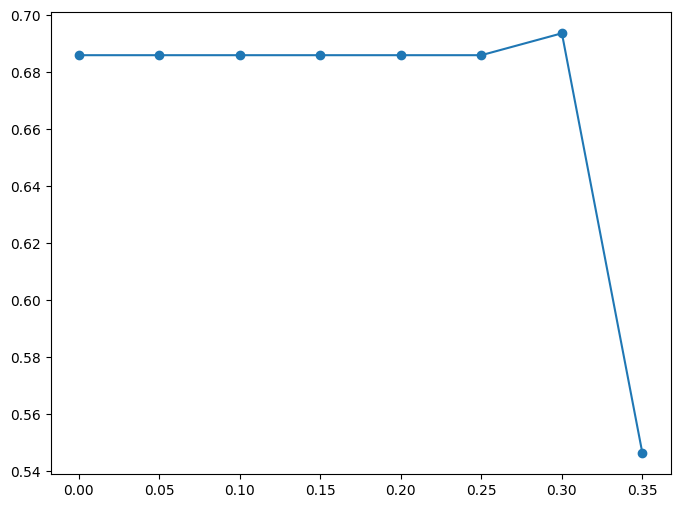

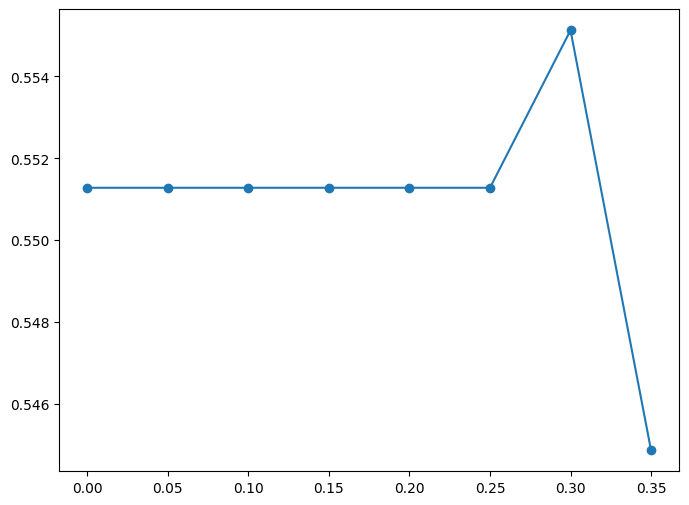

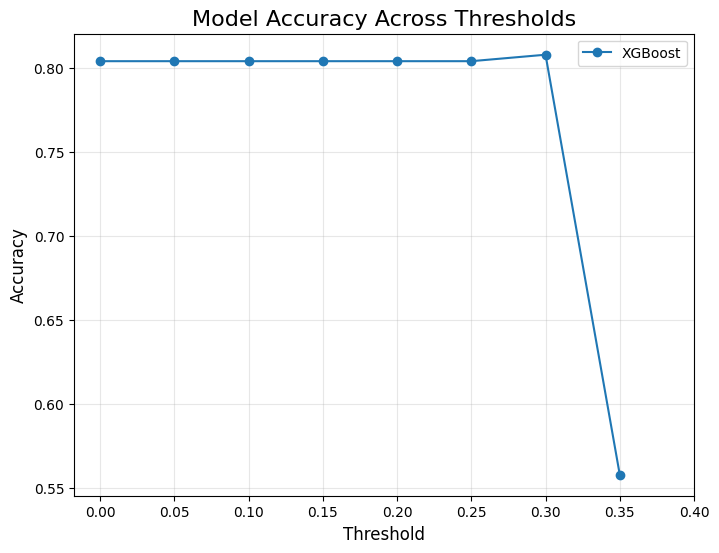

In [ ]:
thresholds = np.arange(0, 0.45, 0.05)
model_performance = {}

for threshold in thresholds:
    selected_features = P[P['Probability'] > threshold]['Feature']
    if selected_features.empty:
        print("No features selected for this threshold. Skipping...")
        continue

    # Create reduced dataset
    X_train_reduced = X_train[selected_features.to_list()].copy() #Using a copy to prevent SettingWithCopyWarning
    X_test_reduced = X_test[selected_features.to_list()].copy()

    # Reduce y_train to have same length as X_train_reduced
    y_train_reduced = y_train[X_train_reduced.index]

    # Remap class labels from -1 and 1 to 0 and 1
    y_train_reduced = y_train_reduced.replace({-1: 0, 1: 1})
    y_test = y_test.replace({-1: 0, 1: 1})


    # Impute NaN values with the mean
    imputer = SimpleImputer(strategy='mean')
    X_train_reduced = pd.DataFrame(imputer.fit_transform(X_train_reduced), index=X_train_reduced.index, columns=X_train_reduced.columns)
    X_test_reduced = pd.DataFrame(imputer.transform(X_test_reduced), index=X_test_reduced.index, columns=X_test_reduced.columns)


    # Standardize the data
    X_train_reduced = pd.DataFrame(scaler.fit_transform(X_train_reduced), index=X_train_reduced.index, columns=X_train_reduced.columns)
    X_test_reduced = pd.DataFrame(scaler.transform(X_test_reduced), index=X_test_reduced.index, columns=X_test_reduced.columns)

    # Train and evaluate models
    results = {}
    for model_name, model in models.items():
        print(f"Training {model_name}...")
        model.fit(X_train_reduced, y_train_reduced)
        y_pred = model.predict(X_test_reduced)
        acc = accuracy_score(y_test, y_pred)
        results[model_name] = acc

    # Store results for this threshold
    model_performance[threshold] = results



# Visualize model performance across thresholds
for model_name in models.keys():
    plt.figure(figsize=(8, 6))
    plt.plot(
        list(model_performance.keys()),
        [results[model_name] for results in model_performance.values()],
        marker='o', label=model_name
    )

plt.title('Model Accuracy Across Thresholds', fontsize=16)
plt.xlabel('Threshold', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(thresholds)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [ ]:
print(model_performance)
for threshold, results in model_performance.items():
    print(f"Threshold: {threshold}")
    for model_name, accuracy in results.items():
        print(f"{model_name}: {accuracy}")
    print()

{0.0: {'Logistic Regression': 0.5461538461538461, 'Random Forest': 0.6858974358974359, 'SVC': 0.5512820512820513, 'XGBoost': 0.8038461538461539}, 0.05: {'Logistic Regression': 0.5461538461538461, 'Random Forest': 0.6858974358974359, 'SVC': 0.5512820512820513, 'XGBoost': 0.8038461538461539}, 0.1: {'Logistic Regression': 0.5461538461538461, 'Random Forest': 0.6858974358974359, 'SVC': 0.5512820512820513, 'XGBoost': 0.8038461538461539}, 0.15000000000000002: {'Logistic Regression': 0.5461538461538461, 'Random Forest': 0.6858974358974359, 'SVC': 0.5512820512820513, 'XGBoost': 0.8038461538461539}, 0.2: {'Logistic Regression': 0.5461538461538461, 'Random Forest': 0.6858974358974359, 'SVC': 0.5512820512820513, 'XGBoost': 0.8038461538461539}, 0.25: {'Logistic Regression': 0.5461538461538461, 'Random Forest': 0.6858974358974359, 'SVC': 0.5512820512820513, 'XGBoost': 0.8038461538461539}, 0.30000000000000004: {'Logistic Regression': 0.5358974358974359, 'Random Forest': 0.6935897435897436, 'SVC': 0.

In [ ]:
{'Logistic Regression': 0.5487179487179488,
 'Random Forest': 0.708974358974359,
 'SVC': 0.5371794871794872,
 'XGBoost': 0.8025641025641026}

In [ ]:
P.count()

,0
Feature,501
Probability,501


In [ ]:
thresholds = np.arange(0, 0.40, 0.05) # Adjusted range to 0.35 inclusive

for threshold in thresholds:
    print(f"\nEvaluating threshold: {threshold:.2f}")

    # Select features with probabilities above the current threshold
    selected_features = P[P['Probability'] > threshold]['Feature']
    num_selected_features = len(selected_features)
    print(f"Number of features deleted: {501-num_selected_features}")
    print(f"Number of features selected: {num_selected_features}")


Evaluating threshold: 0.00
Number of features deleted: 7
Number of features selected: 494

Evaluating threshold: 0.05
Number of features deleted: 7
Number of features selected: 494

Evaluating threshold: 0.10
Number of features deleted: 7
Number of features selected: 494

Evaluating threshold: 0.15
Number of features deleted: 7
Number of features selected: 494

Evaluating threshold: 0.20
Number of features deleted: 7
Number of features selected: 494

Evaluating threshold: 0.25
Number of features deleted: 7
Number of features selected: 494

Evaluating threshold: 0.30
Number of features deleted: 61
Number of features selected: 440

Evaluating threshold: 0.35
Number of features deleted: 470
Number of features selected: 31


In [ ]:
max_accuracies = {}
for model_name in models.keys():
  max_acc = 0
  for results in model_performance.values():
    if model_name in results:
       max_acc = max(max_acc,results[model_name])
  max_accuracies[model_name] = max_acc

print("\nMaximum Accuracies Across Thresholds:")
for model_name, max_accuracy in max_accuracies.items():
    print(f"  {model_name}: {max_accuracy:.4f}")

NameError: name 'models' is not defined